Daniel Suaza Varela
202311517

In [45]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import diff,symbols,dsolve, expand_complex,Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, asin,pprint, init_printing, Derivative, sqrt, integrate, Eq, lambdify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting

# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

PUNTO 1


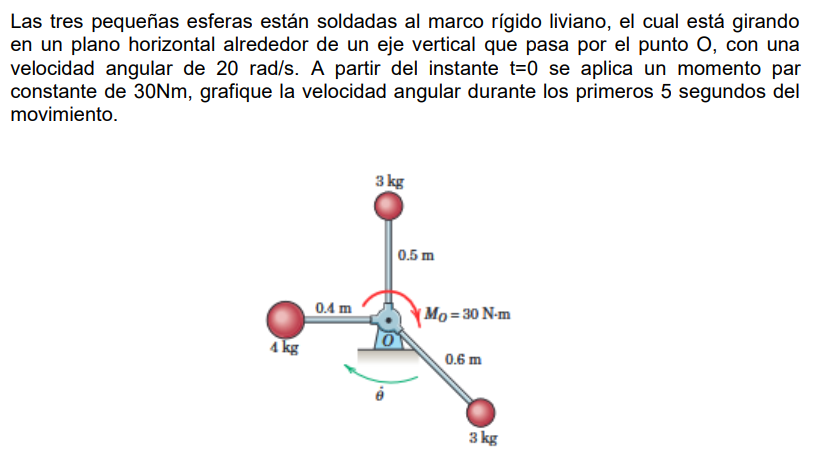

W(theta punto) final, 80.7287449392713 rad/sec


C:\Users\mvare\AppData\Local\Temp\ipykernel_28452\580819914.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(t_v, w_valor, "b.", color="blue")


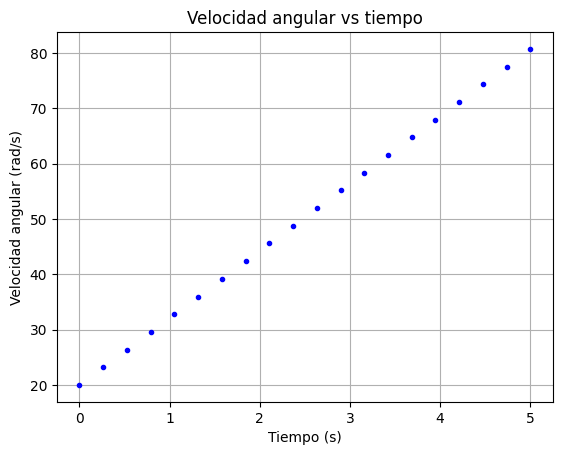

In [93]:
#Establecemos nuestro marco de referencia, thera y los datos
N = ReferenceFrame("N")
theta = dynamicsymbols("theta")
m1, l1, m2, l2, m3, l3, t, m_externo, w_0 = symbols("m1, l1, m2, l2, m3, l3, t, m_externo, w_0")

#Sabemos que antes del torque externo, el sistema giraba con velocidad angular constante = 20 rad/sec
#Lo cual significa que la aceleración angular era 0 (como está en un pin no puede haber aceleración de traslación)
#Por tanto, podemos afirmar que las reacciones, los pesos y los momentos ya estaban estables y por tanto eran 0

#Así, el único cambio que hay en la velocidad angular es fruto de este momento
#El cambio en la velocidad angular es fruto de la aceleración angular (alfa) la cual la podemos relacionar con la ecuación de momentos

#Sum momentos = I*alfa ===> alfa = sum momentos / I, pero como antes estaba estable los momentos deben ser 0 (exceptuando el añadido)
#Por tanto: alfa = M_añadido / I

#Paso 1: Calcular inercia
I = m1*l1**2 + m2*l2**2 + m3*l3**2 

#Paso 2: Calcular alfa
alfa = m_externo/I

#Paso 3: Calcular la velocidad angular(t)
#Es claro que w(t) = w0 + w'*t = w0 + alfa*t
w = w_0 + alfa*t


#Paso 4: Hacemos la gráfica
dicti = { l1:0.5, l2:0.4, l3:0.6, m1:3, m2:4, m3:3, m_externo:30, w_0:20}
w_valor = w.subs(dicti)
print("W(theta punto) final,",w_valor.subs({t:5}), "rad/sec")
for t_v in np.linspace(0, 5, 20):
    dicti[t] = t_v
    w_valor = w.subs(dicti)
    plt.plot(t_v, w_valor, "b.", color="blue")
        
plt.title("Velocidad angular vs tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad angular (rad/s)")
plt.grid(True)
plt.show()


De acuerdo con la séptima edición del libro, al pasar los 5 segundos la nueva velocidad angular es 

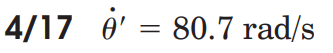


Lo cual coincide exactamente con lo obtenido.

PUNTO 2



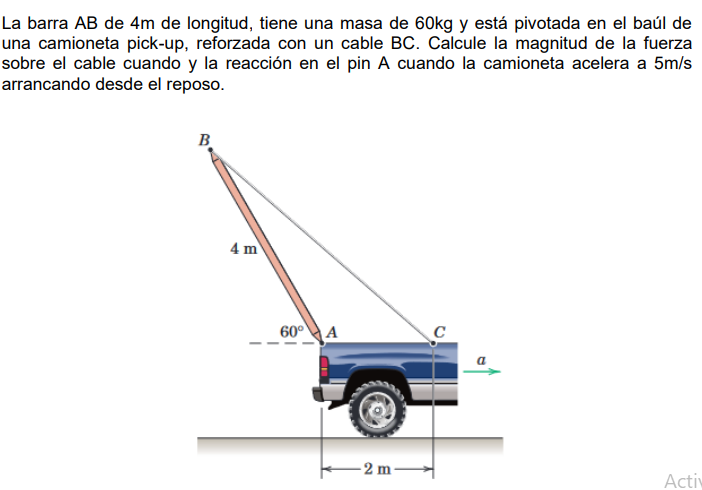

In [77]:
#Creamos el marco de referencia y los simbolos iniciales
N = ReferenceFrame("N") 
AB, m, a, theta, g, AC = symbols("AB, m, a, theta, g, AC") 

#Creamos el marco de referencia desde el punto A
A = N.orientnew("A", "Axis", (pi-theta, N.z)) 

#Creamos el vector posición del centro de masa de la barra
orientacion_barra = (AB/2)*A.x 

#Calculamos la longitud B_C, la longitud de la cuerda
longitud_B_C = sqrt(AB**2 + AC**2 - 2*AB*AC*cos(pi - theta)) 
#Calculamos el ángulo de elevación de la cuerda
angulo_C = asin(sin(pi - theta)*AB/longitud_B_C) 

#Creamos un marco de referencia en el punto C
C = N.orientnew("c", "Axis", (pi- angulo_C, N.z)) 

#FUERZAS
#Creamos el vector de las reacciones
r1_x, r2_y = symbols("r1_x, r2_y") 
reaccion = r1_x*N.x + r2_y*N.y 

#Peso
peso_barra = -m*g*N.y 

#Tensión de la cuerda (sólo puede ir en la dirección de C al ser tensión)
tension_bc_magnitud = symbols("bc_mag") 
tension_bc = tension_bc_magnitud*C.x 

#Planteamiento de fuerzas: Sum fuerzas = m_cm*a_cm ==> 0 = sum_fuerzas - m_cm*a_cm
eqF = reaccion + tension_bc + peso_barra - m*a*N.x 

#Planteamiento de momentos: sum momentos = I*alfa ==> 0 = sum momentos - I*allfa
#No obstante, la barra se mencioan que esté rotando, por lo que theta punto = 0 y theta doble punto (alfa) = 0
#Por lo que sum_momentos = 0
#En el centro de masa, en la barra
#En el cm, el peso no hace momentos, pero sí las reacciones y la tensión
#Desde el cm de la barra, el r de los momentos (rXF) debe ir desde el cm de la barra al punto de aplicación de la fuerza
#Para llegar a la aplicación de la fuerza, toca devolverse lo movido al cm de la barra
#También, para llegar a la tensión toca hacer lo mismo solo que moverse AC unidades a la derecha
eqM = -orientacion_barra.cross(reaccion) + (-orientacion_barra+AC*N.x).cross(tension_bc) 

#Plantear ecuaciones y hallar valores
eqs = [eqF.dot(N.x), eqF.dot(N.y), eqM.dot(N.z)] 
eqs_num = [eq.subs({AB:4, m:60, a:5, theta:np.deg2rad(60), g:9.81, AC:2}) for eq in eqs] 

sln = solve(eqs_num, [tension_bc_magnitud, r1_x, r2_y])
print("F tensión cable BC =", (sln[tension_bc_magnitud]), "N") 
print("F reacción Ax =", (sln[r1_x]), "N") 
print("F reacción Ay =", (sln[r2_y]), "N")
print("F magnitud de A =", ((sln[r1_x]**2 + sln[r2_y]**2)**(0.5)), "N")

F tensión cable BC = -846.413372334855 N
F reacción Ax = -339.828368445013 N
F reacción Ay = 1142.70762113533 N
F magnitud de A = 1192.16778491988 N


De acuerdo con la séptima edición del libro, la respuesta es:
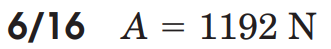

Por tanto, podemos afirmar que nuestro resultado es acertado.

PUNTO 3


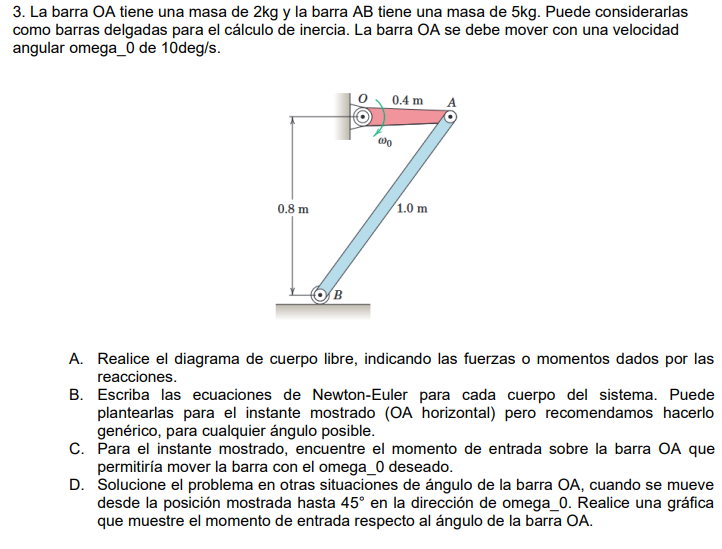

A. Diagrama de cuerpo libre con fuerzas o momentos:

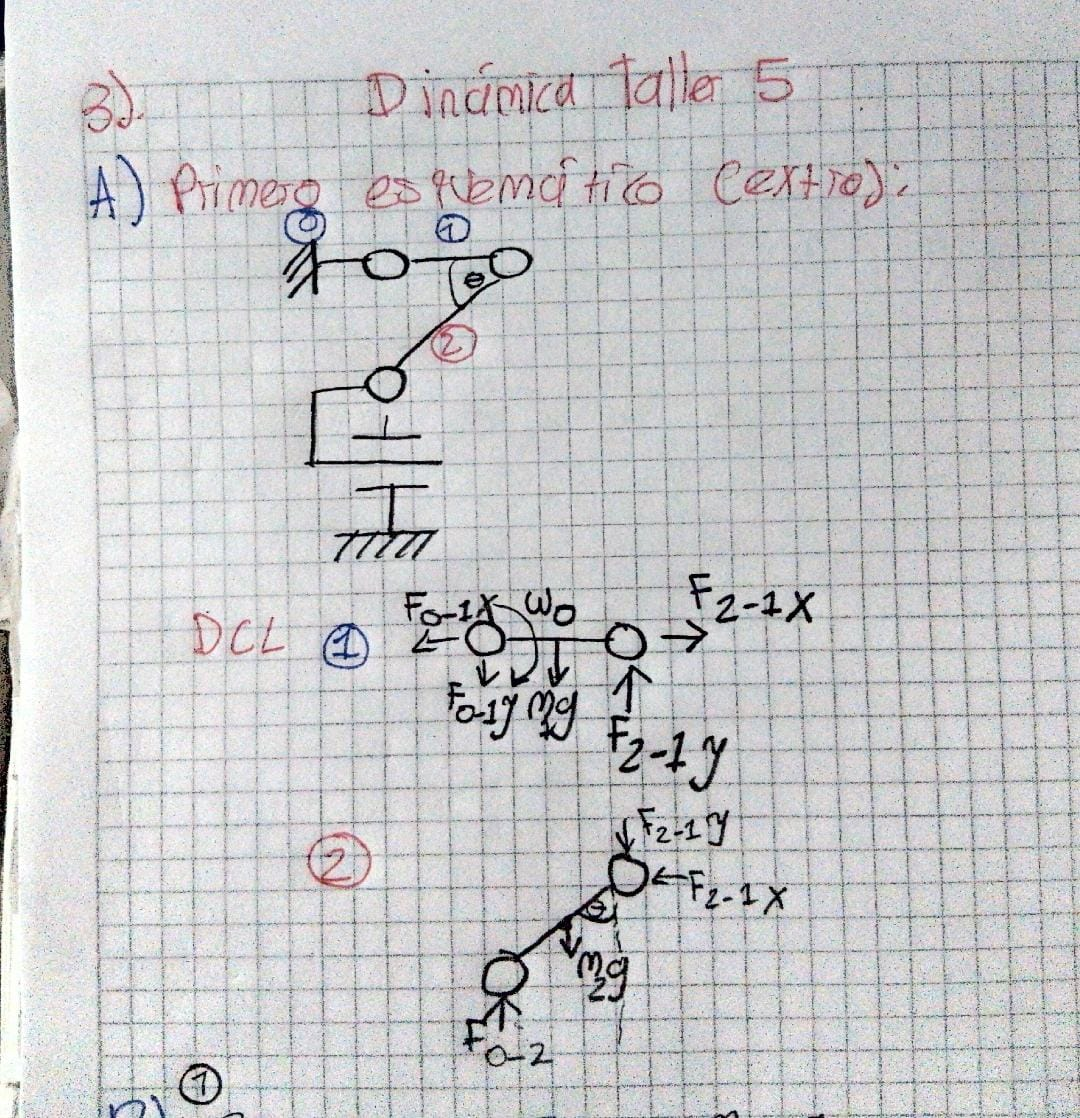

B. Ecuaciones de Newton-Euler para cada cuerpo del sistema. 

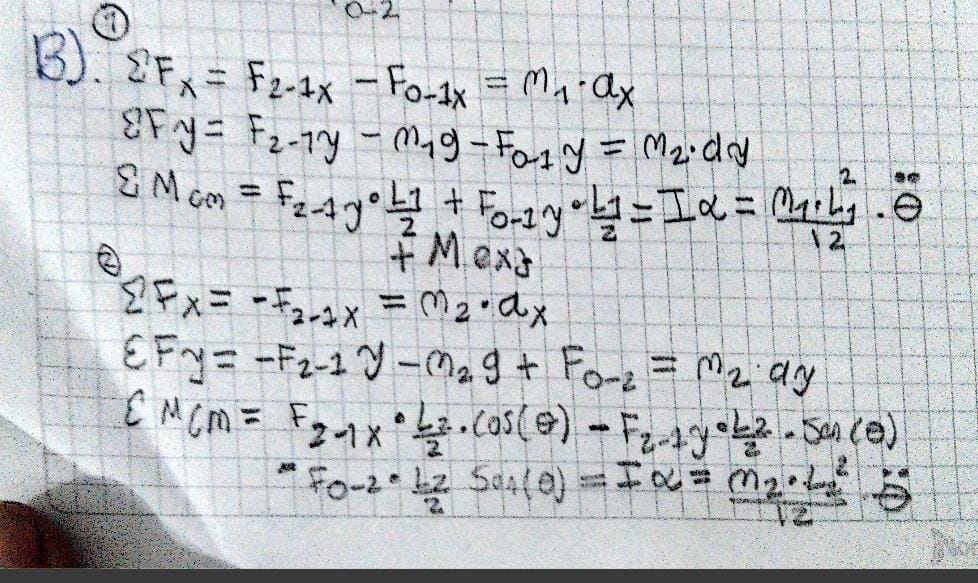

C. Momento de entrada sobre la barra OA 

D. Solución problema

E. Gráfica

In [147]:
#Caso 1: Resolverlo para la situación actual y hallar el momento de entrada
N = ReferenceFrame("N")

#simbolos
m1, l1, m2, l2, h, g, M_ext, w_0 = symbols("m1 l1 m2 l2 h g M_ext w_0")
angulo_A = asin(h/l2)
A = N.orientnew("A", "Axis", (pi/2 + angulo_A,N.z))

#Cuerpo 1 fuerzas---------
F_2_1_x , F_2_1_y = symbols("F_2_1_x , F_2_1_y")
F_2_1 = F_2_1_x*N.x + F_2_1_y*N.y

F_0_1_x , F_0_1_y = symbols("F_0_1_x , F_0_1_y")
F_0_1 = F_0_1_x*N.x + F_0_1_y*N.y

peso_1 = -m1*g*N.y

#Aceleración
a_x_1 , a_y_1 = symbols("a_x_1 , a_y_1")
a_1 = a_x_1*N.x + a_y_1*N.y

#Sumatoria fuerzas cuerpo 1
eqF_1 = F_2_1 + F_0_1 + peso_1 -m1*a_1

#Momentos cuerpo 1
cm_1 = (l1/2)*N.x
M_1 = cm_1.cross(F_2_1)
M_2 = -cm_1.cross(F_0_1)
I_1 = (m1*l1**2)/12 
eqM_1 = M_1 + M_2 + M_ext*N.z - I_1*0*N.z #Si w_0 = cte ==> alfa = 0 pues alfa = cambio w_0

#Cuerpo 2 fuerzas---------
F_1_2 = -F_2_1_x*N.x - F_2_1_x*N.y

F_0_2_y = symbols("F_0_2_y")
F_0_2 = F_0_2_y*N.y 

peso_2 = -m2*g*N.y

#Aceleración
a_x_2 , a_y_2 = symbols("a_x_2 , a_y_2")
a_2 = a_x_2*N.x + a_y_2*N.y

#Sumatoria fuerzas cuerpo 1
eqF_2 = F_1_2 + F_0_2 + peso_2 -m2*a_2

#Momentos cuerpo 2
cm_2 = -(l2/2)*A.y
M_3 = cm_2.cross(F_1_2)
M_4 = cm_2.cross(F_0_2)
I_2 = (m2*l2**2)/12 
eqM_2 = M_3 + M_4 - I_2*0*N.z #Si w_0 = cte ==> alfa = 0 pues alfa = cambio w_0

eqs = [eqF_1.dot(N.x), eqF_1.dot(N.y),eqF_2.dot(N.x), eqF_2.dot(N.y), eqM_1.dot(N.z), eqM_2.dot(N.z)]
dicti = {
    m1:2,
    l1:0.4, 
    m2:5, 
    l2:1,
    h:0.8,
    g:9.81, 
    w_0:np.deg2rad(10)
}
eqs_num = [eq.subs(dicti) for eq in eqs]

sln = solve(eqs_num, [F_0_1_x, F_0_1_y, F_2_1_x, F_2_1_y, a_x_1, a_y_1, F_0_2_y, a_x_2, a_y_2, M_ext])
sln

{F₀ ₁ ₓ: 2.0⋅aₓ ₁ + 3.75⋅a_y_2 + 36.7875, F_0_1_y: 2.5⋅Mₑₓₜ + a_y_1 + 9.81, F_ ↪

↪ 0_2_y: 1.25⋅a_y_2 + 12.2625, F₂ ₁ ₓ: -3.75⋅a_y_2 - 36.7875, F_2_1_y: -2.5⋅Mₑ ↪

↪ ₓₜ + a_y_1 + 9.81, aₓ ₂: 0.75⋅a_y_2 + 7.3575}

Le pasé mi código a ChatGpt para que lo mejorara y hallara el M_ext que pide el enunciado pero el resultado, mostrado a continuación, es insatisfactorio:

In [138]:
from sympy import *
import numpy as np

# --- Marco de referencia ---
N = ReferenceFrame("N")

# --- Orientaciones ---
beta = dynamicsymbols("beta")
O = N.orientnew("O", "Axis", (beta, N.z))

theta = dynamicsymbols("theta")
A = N.orientnew("A", "Axis", (pi/2 + theta, N.z))

# --- Símbolos ---
m1, l1, m2, l2, h, g, M_ext, alpha = symbols("m1 l1 m2 l2 h g M_ext alpha")

# --- Vectores posición ---
v1 = l1 * O.x
v2 = l2 * A.y

# --- Fuerzas ---
F_0_1x, F_0_1y = symbols("F_0_1x F_0_1y")
F_0_1 = F_0_1x * N.x + F_0_1y * N.y

F_0_2_c = symbols("F_0_2_c")
F_0_2 = F_0_2_c * N.y

# --- Pesos ---
peso_1 = -m1 * g * N.y
peso_2 = -m2 * g * N.y

# --- Centro de masas ---
cm_1 = (l1 / 2) * O.x
cm_2 = (l2 / 2) * A.y
cm_general = (m1 * cm_1 + m2 * cm_2) / (m1 + m2)
a_cm = cm_general.diff('t', N).diff('t', N)  # formal, no se usa en solve directo

# --- Ecuación de fuerzas ---
eqF = F_0_1 + F_0_2 + peso_1 + peso_2 - (m1 + m2) * a_cm

# --- Momentos de inercia ---
I_1 = (m1 * l1 ** 2) / 12 + (m1 * (cm_1 - cm_general).magnitude() ** 2)
I_2 = (m2 * l2 ** 2) / 12 + (m2 * (cm_2 - cm_general).magnitude() ** 2)
I = I_1 + I_2

# --- Momentos respecto al centro de masa ---
M_1 = cm_general.cross(F_0_1)
M_2 = cm_general.cross(F_0_2)
M_3 = cm_general.cross(peso_1)
M_4 = cm_general.cross(peso_2)

# --- Ecuación de momentos dinámicos ---
eqM = M_1 + M_2 + M_3 + M_4 - M_ext * N.z - I * alpha * N.z

# --- Ecuaciones escalares ---
eqs = [eqF.dot(N.x), eqF.dot(N.y), eqM.dot(N.z)]

# --- Sustituciones numéricas ---
dicti = {
    m1: 2,
    m2: 5,
    l1: 0.4,
    l2: 1,
    g: 9.81,
    from sympy import *
import numpy as np

# --- Marco de referencia ---
N = ReferenceFrame("N")

# --- Orientaciones ---
beta = dynamicsymbols("beta")
O = N.orientnew("O", "Axis", (beta, N.z))

theta = dynamicsymbols("theta")
A = N.orientnew("A", "Axis", (pi/2 + theta, N.z))

# --- Símbolos ---
m1, l1, m2, l2, h, g, M_ext, alpha = symbols("m1 l1 m2 l2 h g M_ext alpha")

# --- Vectores posición ---
v1 = l1 * O.x
v2 = l2 * A.y

# --- Fuerzas ---
F_0_1x, F_0_1y = symbols("F_0_1x F_0_1y")
F_0_1 = F_0_1x * N.x + F_0_1y * N.y

F_0_2_c = symbols("F_0_2_c")
F_0_2 = F_0_2_c * N.y

# --- Pesos ---
peso_1 = -m1 * g * N.y
peso_2 = -m2 * g * N.y

# --- Centro de masas ---
cm_1 = (l1 / 2) * O.x
cm_2 = (l2 / 2) * A.y
cm_general = (m1 * cm_1 + m2 * cm_2) / (m1 + m2)
a_cm = cm_general.diff('t', N).diff('t', N)  # formal, no se usa en solve directo

# --- Ecuación de fuerzas ---
eqF = F_0_1 + F_0_2 + peso_1 + peso_2 - (m1 + m2) * a_cm

# --- Momentos de inercia ---
I_1 = (m1 * l1 ** 2) / 12 + (m1 * (cm_1 - cm_general).magnitude() ** 2)
I_2 = (m2 * l2 ** 2) / 12 + (m2 * (cm_2 - cm_general).magnitude() ** 2)
I = I_1 + I_2

# --- Momentos respecto al centro de masa ---
M_1 = cm_general.cross(F_0_1)
M_2 = cm_general.cross(F_0_2)
M_3 = cm_general.cross(peso_1)
M_4 = cm_general.cross(peso_2)

# --- Ecuación de momentos dinámicos ---
eqM = M_1 + M_2 + M_3 + M_4 - M_ext * N.z - I * alpha * N.z

# --- Ecuaciones escalares ---
eqs = [eqF.dot(N.x), eqF.dot(N.y), eqM.dot(N.z)]

# --- Sustituciones numéricas ---
dicti = {
    m1: 2,
    m2: 5,
    l1: 0.4,
    l2: 1,
    g: 9.81,
    beta.diff(t): np.deg2rad(10),
    alpha: np.deg2rad(3)  # aceleración angular de ejemplo
}

eqs_num = [simplify(eq.subs(dicti)) for eq in eqs]

# --- Resolver ---
sol = solve(eqs_num, [F_0_1x, F_0_1y, F_0_2_c, M_ext], dict=True)

print("=== Solución simbólica ===")
pprint(sol)

# --- Mostrar M_ext explícitamente ---
if sol:
    print("\n=== Valor numérico de M_ext ===")
    print(sol[0][M_ext].evalf())
else:
    print("No se encontró solución numérica.")
  # aceleración angular de ejemplo
}

eqs_num = [simplify(eq.subs(dicti)) for eq in eqs]

# --- Resolver ---
sol = solve(eqs_num, [F_0_1x, F_0_1y, F_0_2_c, M_ext], dict=True)

print("=== Solución simbólica ===")
pprint(sol)

# --- Mostrar M_ext explícitamente ---
if sol:
    print("\n=== Valor numérico de M_ext ===")
    print(sol[0][M_ext].simplify().subs())
else:
    print("No se encontró solución numérica.")


=== Solución simbólica ===
⎡⎧                      2                                  2                   ↪
⎢⎪                     d                         ⎛d       ⎞                    ↪
⎢⎨F₀ ₁ₓ: 2.5⋅sin(θ(t))⋅───(θ(t)) + 2.5⋅cos(θ(t))⋅⎜──(θ(t))⎟ , F_0_1y: -F_0_2_c ↪
⎢⎪                       2                       ⎝dt      ⎠                    ↪
⎣⎩                     dt                                                      ↪

↪                            2                  2                              ↪
↪                  ⎛d       ⎞                  d                               ↪
↪  + 2.5⋅sin(θ(t))⋅⎜──(θ(t))⎟  - 2.5⋅cos(θ(t))⋅───(θ(t)) + 68.67, Mₑₓₜ: - 0.14 ↪
↪                  ⎝dt      ⎠                    2                             ↪
↪                                              dt                              ↪

↪                                    2                                         ↪
↪                                   d                                          ↪

ValueError: subs accepts either 1 or 2 arguments

PUNTO 4


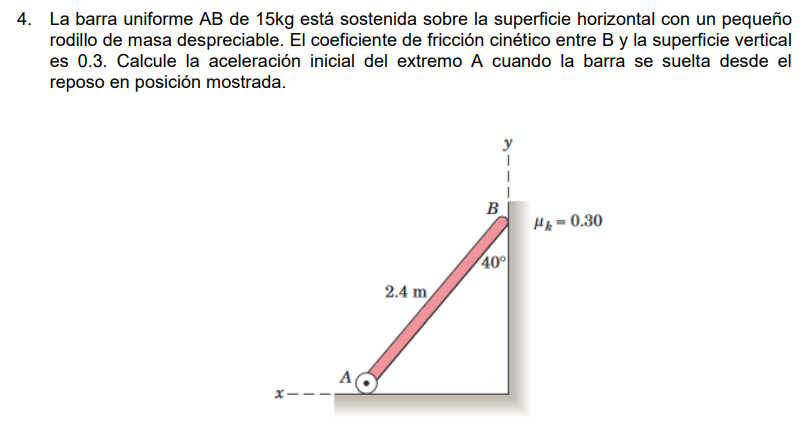

In [116]:

N = ReferenceFrame("N")
m, AB, miu_k, g = symbols("m AB miu_k g")
theta = symbols("theta")  # fijo al inicio
alpha = symbols("alpha")  # aceleración angular

A = N.orientnew("A", "Axis", (pi/2 - theta, N.z))

# Vector posición del centro de masa
pos_cm_barra = (AB/2)*A.x

# Fuerzas
peso = -m*g*N.y

r_normal_A = symbols("r_normal_A")
f_r_normal_A = r_normal_A*N.y

r_normal_B = symbols("r_normal_B")
f_r_normal_B = -r_normal_B*N.x

f_friccion = miu_k*r_normal_B*N.y  # hacia arriba

#Aceleración del centro de masa
#Cuando en un extremo de una varilla hay una velocidad angular:
#V = w * r
#Análogo aquí:
# a = alfa* r
#Además, ese r es la distancia entre donde está la aceleración (en B) y el centro de masa

a_x = -alpha*(AB)*sin(theta)*N.x
a_y = -alpha*(AB)*cos(theta)*N.y

# Sumatoria de fuerzas
#sum fuerzas = m_cm*a_cm ==> sum_fuerzas - m_cm*a_cm = 0
eqF = peso + f_r_normal_A + f_r_normal_B + f_friccion - m*(a_x + a_y)

# Inercia
I = (m*AB**2)/12 

#Sumatoria momentos
rA_cm = -AB/2 * A.x      # desde CM hacia A
rB_cm =  AB/2 * A.x      # desde CM hacia B

# Sumatoria de momentos
eqM = (rA_cm.cross(f_r_normal_A)
      + rB_cm.cross(f_r_normal_B)
      + rB_cm.cross(f_friccion)
      - I*alpha*N.z)
eqs = [eqF.dot(N.x), eqF.dot(N.y), eqM.dot(N.z)]

# Sustituir valores
eqs_num = [eq.subs({m:15, AB:2.4, miu_k:0.3, g:9.81, theta:np.deg2rad(40)}) for eq in eqs]

# Resolver para las incógnitas reales
sln = solve(eqs_num, [r_normal_A, r_normal_B, alpha])
print(sln)

a_x_A = -sln[alpha]*(2.4)*sin(np.deg2rad(40)) #originalmente: -alpha*(AB)*sin(theta)*N.x
print("Aceleración en A", a_x_A)
print("alfa esperado:" ,5.93/(2.4*sin(np.deg2rad(40))))

{alpha: 2.46461484249318, r_normal_A: 62.0722198964987, r_normal_B: 57.0320598025497}
Aceleración en A -3.80213732016998
alfa esperado: 3.84393428886760


De acuerdo con la séptima edición del libro guía, la respuesta esperada es a=  5.93 m/s2 left. Aceleración que no se aleja tanto de la obtenida: -3.8. Por tanto, la discrepancia puede ser por la dirección de la aplicación de una fuerza o por errores al escribir una ecuación.